# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
from __future__ import print_function

import tensorflow as tf

import numpy as np
 
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

import cv2
import os

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']



In [3]:
X_train, y_train = shuffle(X_train, y_train)
#X_test, y_test = shuffle(X_test, y_test)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

num_channels = 1

image_size = X_train.shape[1]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

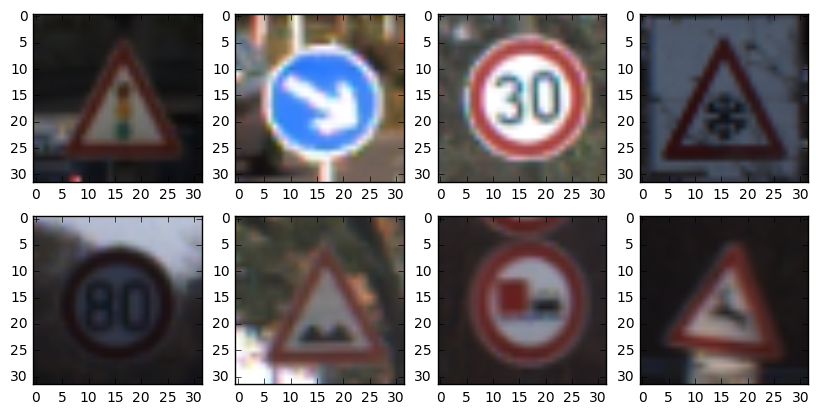

In [6]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(4,4,1)
plt.imshow(X_train[0])
fig.add_subplot(4,4,2)
plt.imshow(X_train[100])
fig.add_subplot(4,4,3)
plt.imshow(X_train[2000])
fig.add_subplot(4,4,4)
plt.imshow(X_train[3000])

fig.add_subplot(4,4,5)
plt.imshow(X_train[10000])
fig.add_subplot(4,4,6)
plt.imshow(X_train[20000])
fig.add_subplot(4,4,7)
plt.imshow(X_train[30000])
fig.add_subplot(4,4,8)
plt.imshow(X_train[39000])

In [7]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

num_channels = 1

image_size = X_train.shape[1]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


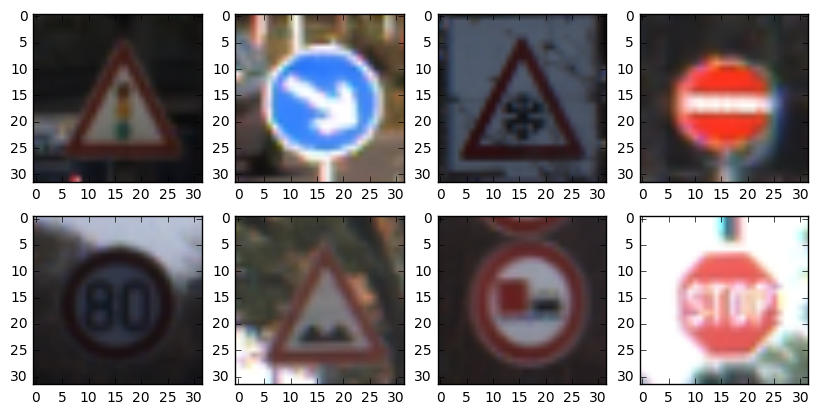

In [8]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(4,4,1)
plt.imshow(X_train[0])
fig.add_subplot(4,4,2)
plt.imshow(X_train[100])
fig.add_subplot(4,4,3)
plt.imshow(X_train[3000])
fig.add_subplot(4,4,4)
plt.imshow(X_train[6000])

fig.add_subplot(4,4,5)
plt.imshow(X_train[10000])
fig.add_subplot(4,4,6)
plt.imshow(X_train[20000])
fig.add_subplot(4,4,7)
plt.imshow(X_train[30000])
fig.add_subplot(4,4,8)
plt.imshow(X_train[35000])

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   240.,   240.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

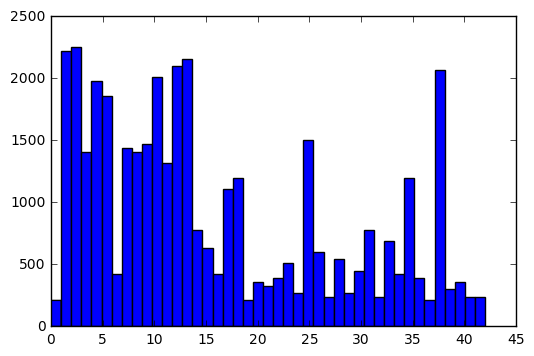

In [9]:
plt.hist(y_train,bins=43)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [11]:
def grayscaleImgArray(arr):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""

    tmpList =[]
    for i in range(len(arr)):
        tmp = cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        tmpList.append(tmp)
    gryImgArray = np.array(tmpList)
    print(gryImgArray[i].shape) 
    return gryImgArray

In [12]:
def normalize_image(img):
    img_mean = np.mean(img)
    img_stddev = np.std(img)
    img = (img - img_mean)/img_stddev
    '''
    xmin = np.min(img)
    xmax = np.max(img)
    
    outMin = -0.5
    outMax = 0.5
    
    factor = (img - xmin)/(xmax - xmin)
    img = outMin + factor * (outMax - outMin)     
    '''
    return img   
    

In [13]:
def reformat(dataset):
    dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
    return dataset

In [14]:
lb = LabelBinarizer()
y_train_ohe = lb.fit_transform(y_train)

X_train_gray = grayscaleImgArray(X_train)
#X_train_norm = np.array([normalize(x)  for x in X_train_gray])
X_train_norm = normalize_image(X_train_gray)
X_train_norm = X_train_norm.reshape((n_train,32,32))

X_test_gray = grayscaleImgArray(X_test)
#X_test_norm = np.array([normalize(x)  for x in X_test_gray])
X_test_norm = normalize_image(X_test_gray)
#X_test_gray = X_test_gray.reshape((n_test,32,32)) #may need to remove this

(32, 32)
(32, 32)


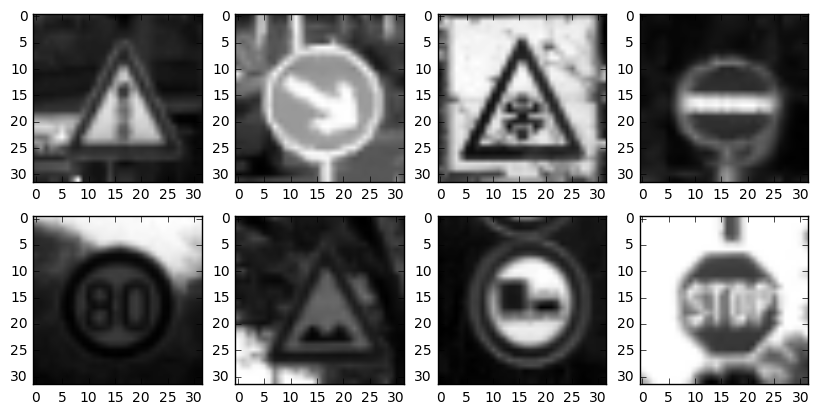

In [15]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(4,4,1)
plt.imshow(X_train_gray[0], cmap='gray')
fig.add_subplot(4,4,2)
plt.imshow(X_train_gray[100], cmap='gray')
fig.add_subplot(4,4,3)
plt.imshow(X_train_gray[3000], cmap='gray')
fig.add_subplot(4,4,4)
plt.imshow(X_train_gray[6000], cmap='gray')

fig.add_subplot(4,4,5)
plt.imshow(X_train_gray[10000], cmap='gray')
fig.add_subplot(4,4,6)
plt.imshow(X_train_gray[20000], cmap='gray')
fig.add_subplot(4,4,7)
plt.imshow(X_train_gray[30000], cmap='gray')
fig.add_subplot(4,4,8)
plt.imshow(X_train_gray[35000], cmap='gray')

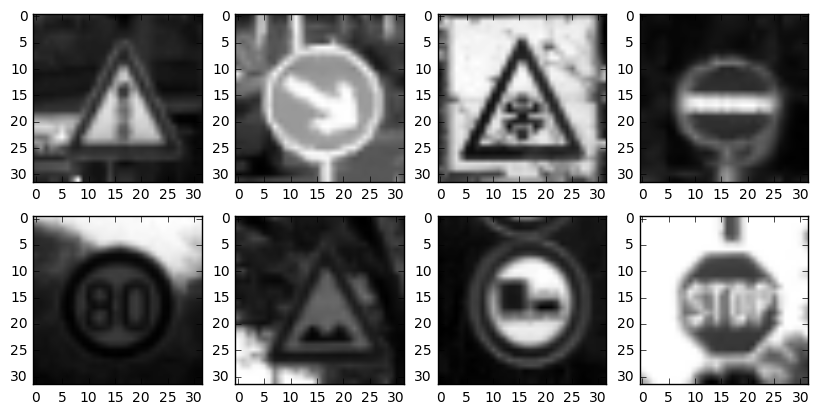

In [16]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(4,4,1)
plt.imshow(X_train_norm[0], cmap='gray')
fig.add_subplot(4,4,2)
plt.imshow(X_train_norm[100], cmap='gray')
fig.add_subplot(4,4,3)
plt.imshow(X_train_norm[3000], cmap='gray')
fig.add_subplot(4,4,4)
plt.imshow(X_train_norm[6000], cmap='gray')

fig.add_subplot(4,4,5)
plt.imshow(X_train_norm[10000], cmap='gray')
fig.add_subplot(4,4,6)
plt.imshow(X_train_norm[20000], cmap='gray')
fig.add_subplot(4,4,7)
plt.imshow(X_train_norm[30000], cmap='gray')
fig.add_subplot(4,4,8)
plt.imshow(X_train_norm[35000], cmap='gray')

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
##### In preprocessing, image is converted to gray scale and then normalized. Normalization is done using mean, std deviation. 
##### Gray image conversion is done using OpenCv - This is done as it has been reported in number of papers that grayscale images give better performance. In this work, focus was to first achieve a reasonable accuracy , after this I will try to test this for colored images also.( ref : http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)
##### Normalization is done by taking mean and std deviation of each image and then subtracting mean from each pixel value and then dividing by std deviation - this is done so that different image features are scaled to same small range. This helps underlying algortihms to converge faster. I have tried min-max standardization also but mean -stdev  seems to be giving better results.
##### Labels are encoded using one hot encoding - this is done for multi-class classification.

##### Training data is shuffled also - this is done so that images are distributed in a random manner and model is trained optimally. We can skip this step as train_test_split also shuffles the data.

In [20]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [21]:
(trainX, valX, trainY, valY) = train_test_split(X_train_norm, y_train_ohe, test_size = 0.05, random_state=0)

In [22]:
train_dataset = reformat(trainX)
train_labels = trainY

valid_dataset = reformat(valX)
valid_labels = valY

test_dataset = reformat(X_test_norm)
test_labels = lb.fit_transform(y_test)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

##### Training data is split into training(75%) and validation data ( 25%). After training model on the split training dataset, it is tested on validation dataset after each epoch.
##### Original test data is kept as such and it will be used for final testing.

In [23]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

*** 
Model 
- 2 convnet layer with relu, pooling and dropout in each layer
    - conv1
        - filter - 5 x 5
        - strides - 1
        - pooling strides - 2
        - depth - 16
    - conv2
        - filter - 5 x 5
        - strides - 1
        - pooling strides - 2
        - depth - 32        
    
- 2 fully connected layers with dropouts
    - each FC layer neaurons - 256
- 1 output layer - 43 output classes
- initial weights are biases are initialized with random values having mean =0 and std dev = 0.05

- L2 Regularization is done to reduce overfitting


batch-size - 128
dropout rate is 0.75



In [65]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [83]:
batch_size = 128#64
display_step = 10

# Network Parameters
n_input = 1024 # (input img shape: 32*32)
#n_classes = 43 # MNIST total classes (0-9 digits)
dropout = 0.75 # changed from 0.75 
init_stdev = 0.05


In [84]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

In [85]:
# Create some wrappers for simplicity
def conv2d(x, W, b,dropout, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, dropout)
    return x

In [86]:
def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [87]:
# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    #print("1")
    x = tf.reshape(x, shape=[-1, 32, 32, 1])
    #print("2")
    print(x.get_shape().as_list())
    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'],dropout)
    #conv1 = conv2d(conv1, weights['wc2'], biases['bc2'])
    #conv1 = tf.nn.relu(conv1)##############
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'],dropout)
    #conv2 = conv2d(conv2, weights['wc4'], biases['bc4'])
    # Max Pooling (down-sampling)
    #conv2 = tf.nn.relu(conv2)##############
    conv2 = maxpool2d(conv2, k=2)

    #print("3")
    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    wc1_total = 16 * 16 * 16
    wc2_total = 8 * 8 * 32
    wc1_flat = tf.reshape(conv1, [-1, wc1_total])  #row size should be batch size
    wc2_flat = tf.reshape(conv2, [-1, wc2_total])  #row size should be batch size
    fc_input = tf.concat(1, [wc1_flat, wc2_flat])  #should concat the rows    
    
    

    fc1 = tf.add(tf.matmul(fc_input, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)

    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    


    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    #print("5")
    # Apply Dropout
    fc2 = tf.nn.dropout(fc2, dropout)   
   

    
    #print("6")
    # Output, class prediction
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    #print("7")
    return out

In [103]:
weights = {
    # 5x5 conv, 1 input, 32 outputs  

    
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 16], stddev = init_stdev)),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 16, 32], stddev = init_stdev)),
    'wd1': tf.Variable(tf.truncated_normal([16 * 16 * 16 + 8 * 8 * 32, 256],  stddev = init_stdev)),
    'wd2': tf.Variable(tf.truncated_normal([256, 256],  stddev = init_stdev)),                                           
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.truncated_normal([256, n_classes], stddev = init_stdev))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([16],  stddev = init_stdev)),
    'bc2': tf.Variable(tf.random_normal([32],  stddev = init_stdev)),
    'bd1': tf.Variable(tf.random_normal([256],  stddev = init_stdev)),
    'bd2': tf.Variable(tf.random_normal([256],  stddev = init_stdev)),
    'out': tf.Variable(tf.random_normal([n_classes],  stddev = init_stdev))
}

In [104]:
# Construct model
pred = conv_net(x, weights, biases, keep_prob)

#print("8")
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))

[None, 32, 32, 1]


In [105]:
# L2 regularization 
regularizers = tf.nn.l2_loss(weights['wc1']) + tf.nn.l2_loss(biases['bc1']) + \
               tf.nn.l2_loss(weights['wc2']) + tf.nn.l2_loss(biases['bc2']) + \
               tf.nn.l2_loss(weights['wd1']) + tf.nn.l2_loss(biases['bd1']) + \
               tf.nn.l2_loss(weights['wd2']) + tf.nn.l2_loss(biases['bd2']) + \
               tf.nn.l2_loss(weights['out']) + tf.nn.l2_loss(biases['out'])

beta = 0.0001
cost += beta * regularizers

In [106]:
optimizer = tf.train.AdamOptimizer().minimize(cost)

In [107]:
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [108]:
# Initializing the variables
init = tf.global_variables_initializer()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    num_steps = int(train_labels.shape[0] / batch_size)
    #training_iters = train_labels.shape[0]
    # Keep training until reach max iterations
    #while step * batch_size < training_iters:
    #print("num_steps =", num_steps)    
    #print("batch_size =", batch_size) 
    epoch = 41
    valid_dataset = valid_dataset.flatten().reshape(valid_dataset.shape[0], 1024)
    test_dataset = test_dataset.flatten().reshape(test_dataset.shape[0], 1024)
    
    loss_list = []
    valid_acc = []
    for i in range(epoch):
        #train_dataset, train_labels = shuffle(train_dataset, train_labels)        
        for step in range(num_steps):
            #batch_x_old, batch_y_old = mnist.train.next_batch(batch_size)
            #print("12")
            #if step % 114 == 0:
            #    print("Epoch = " + str(i + 1) + ", batch " + str(step + 1) , " of " , str(num_steps) )
           
            
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            #print("13")
            batch_x = (train_dataset[offset:(offset + batch_size), :, :, :]).flatten().reshape(batch_size, 1024)
            #print("14")
            #batch_data = train_dataset[offset:(offset + batch_size), :, :]
            batch_y = train_labels[offset:(offset + batch_size), :]        
            #print("15")
        # Run optimization op (backprop)
            #print(type(batch_x),batch_x.shape)
            #print(type(batch_y),batch_y.shape)
            #print(type(batch_x_old),batch_x_old.shape)
            #print(type(batch_y_old),batch_y_old.shape)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,keep_prob: dropout})
            

            #print("16")
        
        if i % display_step == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cost, accuracy], feed_dict={x: valid_dataset,
                                                          y: valid_labels,
                                                          keep_prob: 1.})
            print("Epoch " + str(i + 1) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Validation Accuracy= " + \
                  "{:.5f}".format(acc))            
                
            loss_list.append(loss)
            valid_acc.append(acc)
        #step += 1
    print("Optimization Finished!")
    
    saver = tf.train.Saver()
    save_file = os.path.join(os.getcwd(), 'model_wout_jittered_images_trainData_v02.chkpnt')
    saver.save(sess, save_file)

    print("epoch -", i + 1, "Testing Accuracy:", \
    sess.run(accuracy, feed_dict={x: test_dataset[:6000],
                                  y: test_labels[:6000],
                                  keep_prob: 1.}))


Epoch 1, Minibatch Loss= 0.460718, Validation Accuracy= 0.92453
Epoch 11, Minibatch Loss= 0.155236, Validation Accuracy= 0.98776
Epoch 21, Minibatch Loss= 0.135225, Validation Accuracy= 0.99439
Epoch 31, Minibatch Loss= 0.138049, Validation Accuracy= 0.99439
Epoch 41, Minibatch Loss= 0.139383, Validation Accuracy= 0.99235
Optimization Finished!
epoch - 41 Testing Accuracy: 0.949


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

*** 
##### AdamOptimizer is used with default learning rate

##### Batch size - 128 - I tried with 64 also but it was taking more time

##### Epochs - 41 epoch - 41 Testing Accuracy: 0.949 My Test Data Accuracy: 0.0

##### dropout = 0.75 

##### Validation dataset accuracy is measured after every 10 epochs

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

##### I came up with this approach using trial and errors , I started with the example MNIST model and taking cues from forums tried various approaches, different block sizes 32, 64, 128, different filter sizes 3x3, 5x5 etc. I can not really comment on these models as after trying all these and finding that 32 block size is better and 3*3 filter is better results, I found out that I was testing after every 10 epochs. Although it gave me around 94% test data accuracy but this method was wrong as I should not have used test dataset until the model has finished all epochs. I had tried these with only 1 FC layer. After I fixed the test dataset testing, i found out that my test accuracy was only around 88%. As I had already tried different block sizes and filters, I realized that I need improvement in my NN and need more complex NN. So I added dropouts in convnet layers and added one more fully connected layer.  As my training set accuracy was around 100% and validation set was around 98% but test accuracy around 88%, it seemed to be a sign of overfitting. So I added L2 regularization also. And it gave me excellent results with validation test accuracy of 99% and test accuracy around 94% .

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [77]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [109]:
my_test_data_X = np.array([5,32,32,3])
import matplotlib.image as mpimg
img1 = mpimg.imread("bicycle.jpg")

img2 = mpimg.imread("NoEntry.jpg")

img3 = mpimg.imread("Pedestrian.jpg")

img4 = mpimg.imread("SL_30.jpg")

img5 = mpimg.imread("StopSign.jpg")

'''
img1 = X_train[20000]
img2 = X_train[50] #15000 #60 #21
img3 = X_train[74] #74 children 
img4 = X_train[25000]#130 #34 $151
img5 = X_train[200]
'''

my_test_data_X = np.vstack([img1,img2,img3,img4,img5]).reshape(5,32,32,3)

my_test_labels_Y = np.zeros(5 * 43).reshape(5,43)

my_test_labels_Y[0][29] = 1 #29
my_test_labels_Y[1][17] = 1 #17
my_test_labels_Y[2][27] = 1 #27
my_test_labels_Y[3][1] = 1 #1
my_test_labels_Y[4][14] = 1 #14

'''
my_test_labels_Y[0][y_train[20000]] = 1 #29
my_test_labels_Y[1][y_train[50]] = 1 #17
my_test_labels_Y[2][y_train[74]] = 1 #27
my_test_labels_Y[3][y_train[25000]] = 1 #1
my_test_labels_Y[4][y_train[200]] = 1 #14
'''


'\nmy_test_labels_Y[0][y_train[20000]] = 1 #29\nmy_test_labels_Y[1][y_train[50]] = 1 #17\nmy_test_labels_Y[2][y_train[74]] = 1 #27\nmy_test_labels_Y[3][y_train[25000]] = 1 #1\nmy_test_labels_Y[4][y_train[200]] = 1 #14\n'

In [110]:
my_test_gray = grayscaleImgArray(my_test_data_X)
my_test_norm = np.array([normalize(x)  for x in my_test_gray])

my_test_dataset = reformat(my_test_norm)
my_test_dataset = my_test_dataset.flatten().reshape(my_test_dataset.shape[0], 1024)
#my_test_labels = lb.fit_transform(my_test_labels_Y)

(32, 32)


C:\Users\navneet123\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


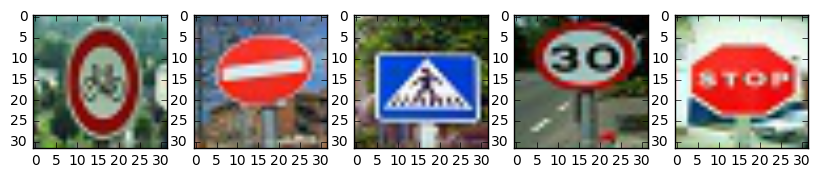

In [111]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,5,1)
plt.imshow(img1)
fig.add_subplot(1,5,2)
plt.imshow(img2)
fig.add_subplot(1,5,3)
plt.imshow(img3)
fig.add_subplot(1,5,4)
plt.imshow(img4)
fig.add_subplot(1,5,5)
plt.imshow(img5)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
##### Predictions are shown below :

In [98]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [112]:
## Just to re-test testing dataset accuracy to make sure that restored model is working fine
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    # Restore variables from disk.
    save_file = os.path.join(os.getcwd(), 'model_wout_jittered_images_trainData_v02.chkpnt')
    saver.restore(sess, save_file)
    print("Model restored.")
    print ("My Test Data Accuracy:", sess.run(accuracy, feed_dict={x: test_dataset[:6000],
                                  y: test_labels[:6000],
                                  keep_prob: 1.}))

Model restored.
My Test Data Accuracy: 0.949


In [113]:
saver = tf.train.Saver()

with tf.Session() as sess:
    
    # Restore variables from disk.
    save_file = os.path.join(os.getcwd(), 'model_wout_jittered_images_trainData_v02.chkpnt')
    saver.restore(sess, save_file)
    print("Model restored.")
    print ("My Test Data Accuracy:", sess.run(accuracy, feed_dict={x: my_test_dataset,
                                  y: my_test_labels_Y,
                                  keep_prob: 1.}))
    print ("Pred :", sess.run(tf.argmax(pred,1), feed_dict={x: my_test_dataset,
                              y: my_test_labels_Y,
                              keep_prob: 1.}))
    print ("Actual Label :", [np.argmax(x) for x in my_test_labels_Y])
    
    predicted_labels =  sess.run(tf.argmax(pred,1), feed_dict={x: my_test_dataset,
                              y: my_test_labels_Y,
                              keep_prob: 1.})

Model restored.
My Test Data Accuracy: 0.0
Pred : [40 40  1 40 40]
Actual Label : [29, 17, 27, 1, 14]


In [ ]:
print(predicted_labels)

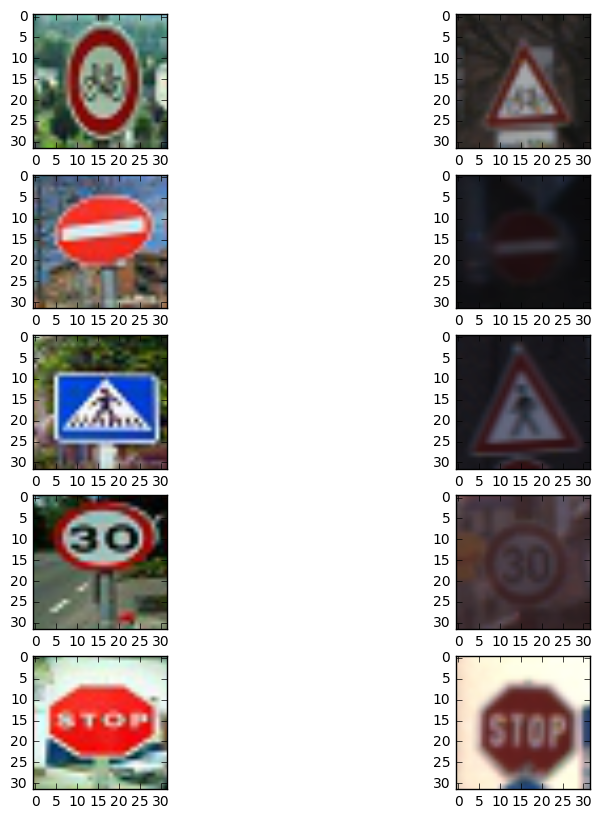

In [114]:
# Images as it should have been predicted

fig = plt.figure(figsize=(10,10))
fig.add_subplot(5,2,1)
plt.imshow(img1)
fig.add_subplot(5,2,3)
plt.imshow(img2)
fig.add_subplot(5,2,5)
plt.imshow(img3)
fig.add_subplot(5,2,7)
plt.imshow(img4)
fig.add_subplot(5,2,9)
plt.imshow(img5)

#for pred_label_value in pred_label_values:
#    for index, val in enumerate(y_train) where val == pred_label_value
    
pred_label_values = [np.argmax(x) for x in my_test_labels_Y]

fig.add_subplot(5,2,2)
plt.imshow(X_train[np.where(y_train == pred_label_values[0])[0][0]])
fig.add_subplot(5,2,4)
plt.imshow(X_train[np.where(y_train == pred_label_values[1])[0][0]])
fig.add_subplot(5,2,6)
plt.imshow(X_train[np.where(y_train == pred_label_values[2])[0][0]])
fig.add_subplot(5,2,8)
plt.imshow(X_train[np.where(y_train == pred_label_values[3])[0][0]])
fig.add_subplot(5,2,10)
plt.imshow(X_train[np.where(y_train == pred_label_values[4])[0][0]])


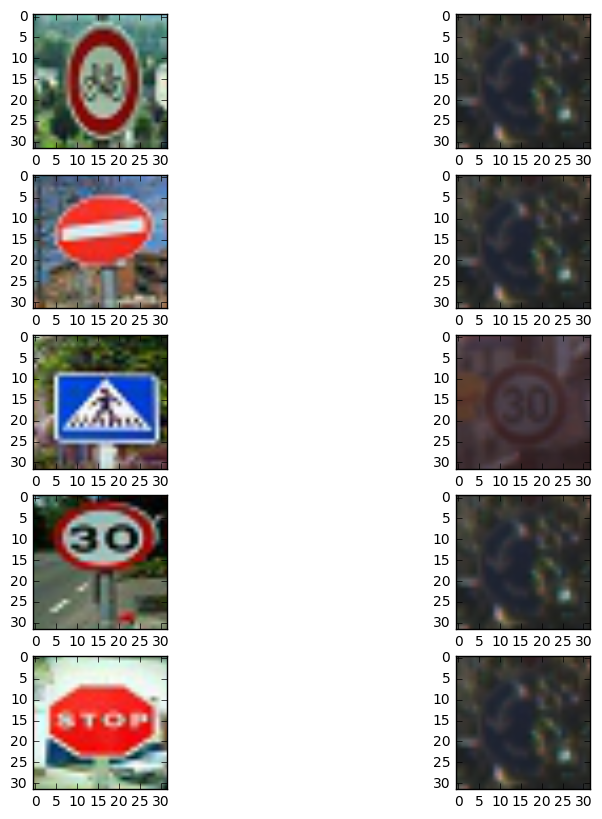

In [115]:
# Images as it actually predicted

fig = plt.figure(figsize=(10,10))
fig.add_subplot(5,2,1)
plt.imshow(img1)
fig.add_subplot(5,2,3)
plt.imshow(img2)
fig.add_subplot(5,2,5)
plt.imshow(img3)
fig.add_subplot(5,2,7)
plt.imshow(img4)
fig.add_subplot(5,2,9)
plt.imshow(img5)

#for pred_label_value in pred_label_values:
#    for index, val in enumerate(y_train) where val == pred_label_value
    
pred_label_values = predicted_labels

fig.add_subplot(5,2,2)
plt.imshow(X_train[np.where(y_train == pred_label_values[0])[0][0]])
fig.add_subplot(5,2,4)
plt.imshow(X_train[np.where(y_train == pred_label_values[1])[0][0]])
fig.add_subplot(5,2,6)
plt.imshow(X_train[np.where(y_train == pred_label_values[2])[0][0]])
fig.add_subplot(5,2,8)
plt.imshow(X_train[np.where(y_train == pred_label_values[3])[0][0]])
fig.add_subplot(5,2,10)
plt.imshow(X_train[np.where(y_train == pred_label_values[4])[0][0]])

##### I took five images and I used signnames.csv to assign labels to these images. 

##### These images and their actual expected labels and predicted labels are shown in above cells.

##### Accuracy is 0.0 , which means that it did not predict any image correctly.

##### Some of the new images are quite different from the trained images. This resulted in low accuracy. it seems that somemore training images are required to make it success for nw images
    Image 1 - in new image Cycle is in circle whereas for training image, it is in a triangle
    Image 2 - in new image there are background images and image has shear effect because of size change
    Image 3 - in new image Pedestrian is in square and image has blue color whereas for training image, it is in triangle
    Image 4 - in new image there are extra objects in image 
    Image 5 - in new image, image appears to be jittered and blurry and it has other objects,
    whereas training image is clear.


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
##### Prediction accuracy seemed to be around 20% as shown in results above. Model has predicted only one image correctly. Some of the new images are quite different from the trained images. This resulted in low accuracy. it seems that somemore training images are required to make it success for nw images


In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [116]:
saver = tf.train.Saver()

pred_val = tf.argmax(pred, 1)

pred_softmax = tf.nn.softmax(pred)
pred_topFive = tf.nn.top_k(pred_softmax, k=5)

with tf.Session() as sess:
    
    # Restore variables from disk.
    save_file = os.path.join(os.getcwd(), 'model_wout_jittered_images_trainData_v02.chkpnt')
    saver.restore(sess, save_file)
    print("Model restored.")
    
    soln_vals, soln_topFive = sess.run([pred_val, pred_topFive], feed_dict={x: my_test_dataset, keep_prob: 1.})

   
print('soln_vals: ', soln_vals)

Model restored.
soln_vals:  [40 40  1 40 40]


In [117]:
print( 'soln_topFive: ', soln_topFive)

soln_topFive:  TopKV2(values=array([[ 0.17695625,  0.13175789,  0.1301655 ,  0.10891481,  0.08655815],
       [ 0.4305236 ,  0.11614835,  0.10348432,  0.07595777,  0.04465493],
       [ 0.57905096,  0.13414493,  0.04152235,  0.03874794,  0.03474461],
       [ 0.21843037,  0.13156897,  0.10499897,  0.0963338 ,  0.0369592 ],
       [ 0.39038509,  0.22414471,  0.12546606,  0.03588666,  0.0344172 ]], dtype=float32), indices=array([[40,  2,  1, 38, 35],
       [40, 32, 11, 12,  6],
       [ 1, 18, 11,  6, 38],
       [40, 35, 38, 11, 25],
       [40,  1, 38, 32,  6]]))


[[40  2  1 38 35]
 [40 32 11 12  6]
 [ 1 18 11  6 38]
 [40 35 38 11 25]
 [40  1 38 32  6]]


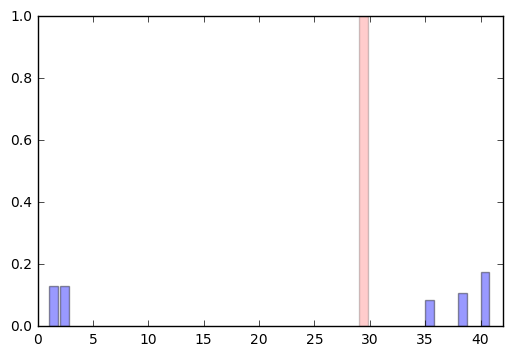

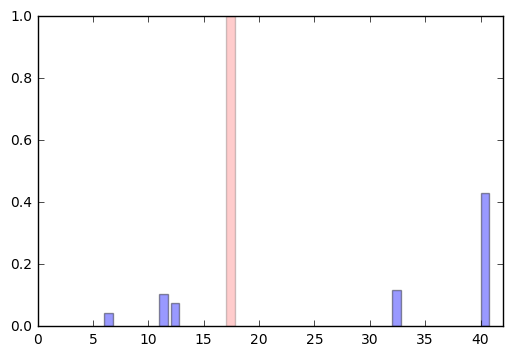

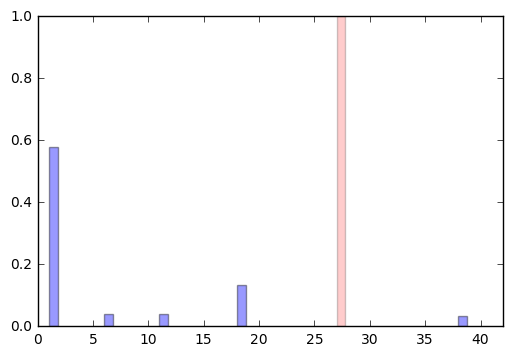

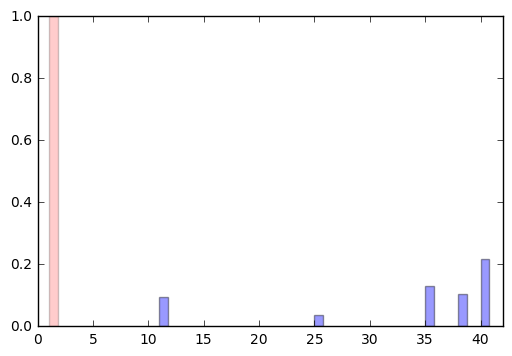

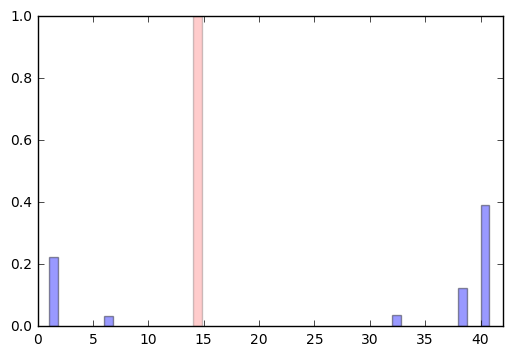

In [118]:
topFive_values = soln_topFive.values
topFive_indices = soln_topFive.indices

actual_class = [29,17,27,1,14]

print(topFive_indices)
i = 0

for index, vals_array in enumerate(topFive_values):
    y = vals_array
    x = topFive_indices[index][:]
    fig = plt.figure()    
    plt.bar(x, y, color="blue", alpha = 0.4)
    plt.bar(actual_class[i],1,color="red", alpha = 0.2)
    i = i + 1
    plt.axis([0, 42, 0, 1])


**Answer:**
##### Out of 5 images, the class predicted is correct only for the last(5th) image. The top 1st image was the correct one.

##### Image 1 - None of the top 5 images predicted by the model correctly matches with the image. Actual Label - 29, Top 5 labels - [ 40  2  1 38 35
##### Image 2 - None of the top 5 images predicted by the model correctly matches with the image. Actual Label - 17, Top 5 labels - [40 32 11 12  6]
##### Image 3 - None of the top 5 images predicted by the model correctly matches with the image. Actual Label - 27, Top 5 labels - [ 1 18 11  6 38]
##### Image 4 - None of the top 5 images predicted by the model correctly matches with the image. Actual Label - 1, Top 5 labels -   [ 40 35 38 11 25]
##### Image 5 - None of the top 5 images predicted by the model correctly matches with the image. Actual Label - 14, Top 5 labels - [40  1 38 32  6]

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.